In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('spam.csv', encoding='cp1252')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
df.duplicated().sum()

403

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df=df[['v2','v1']]

In [84]:
df=df.rename(columns={'v2':'text','v1':'spam'})

In [85]:
df['spam'].unique()

array(['ham', 'spam'], dtype=object)

In [86]:
df

,text,spam
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [87]:
df['spam']=df['spam'].replace({'spam':1,
                   'ham':0})

In [88]:
df[df['spam']==1]

,text,spam
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,REMINDER FROM O2: To get 2.50 pounds free call...,1


<Axes: xlabel='spam', ylabel='count'>

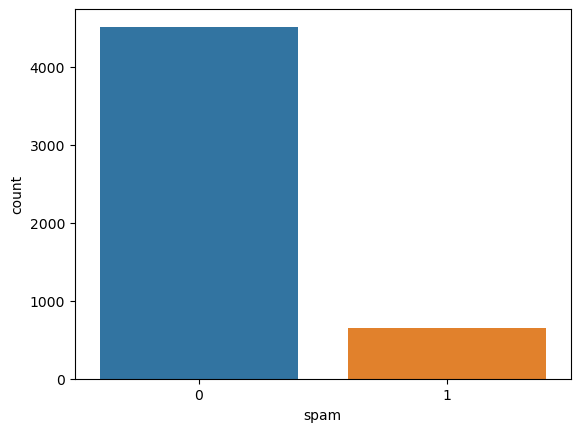

In [89]:
sns.countplot(x=df['spam'])

In [90]:
df['spam'].value_counts()

spam
0    4516
1     653
Name: count, dtype: int64

In [91]:
df.sample(100)

,text,spam
2807,Yes princess! I want to catch you with my big ...,0
3090,LORD OF THE RINGS:RETURN OF THE KING in store ...,1
3711,Wat u doing there?,0
1069,Jus finish bathing...,0
4399,Juz go google n search 4 qet...,0
...,...,...
3431,Camera - You are awarded a SiPix Digital Camer...,1
568,Love it! Daddy will make you scream with pleas...,0
2923,Thts god's gift for birds as humans hav some n...,0
5387,I will be gentle baby! Soon you will be taking...,0


# text preprocessing


In [92]:
df['text']=df['text'].str.lower()

In [93]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [94]:
df['text'] = df['text'].apply(remove_html_tags)

In [95]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [96]:
df['text']=df['text'].apply(remove_emoji)

In [97]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [98]:
df['text']=df['text'].apply(remove_url)

In [99]:
import string

In [100]:
exclude=string.punctuation

In [101]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [102]:
df['text']=df['text'].apply(remove_punc1)

In [103]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [105]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [106]:

df['text']=df['text'].apply(remove_stopwords)


In [107]:
from nltk.stem.porter import PorterStemmer

In [108]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [109]:
df['text'].apply(stem_words)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [110]:
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
df['text']=df['text'].apply(word_tokenize)

In [112]:
df.sample(5)

,text,spam
1565,"[ltgt, g, saw, days, ago, guy, wants, sell, wi...",0
4042,"[literally, bed, like, ltgt, hours]",0
4060,"[aight, ive, set, free, think, could, text, bl...",0
2392,"[thanks, da, thangam, feel, happy, dear, also,...",0
2701,"[hiya, sorry, didnt, hav, signal, havent, seen...",0


#  model building

In [113]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# text vectorization


In [115]:
# bow
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [133]:
cv=CountVectorizer()
tv=TfidfVectorizer(max_features=3000)

In [134]:
df['text'] = df['text'].astype(str)

In [143]:
x=cv.fit_transform(df['text']).toarray()


In [144]:
y=df['spam']


In [145]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# smote

In [146]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [147]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [148]:
rv=RandomOverSampler(random_state=42)
X_train_rv,y_train_rv=rv.fit_resample(X_train,y_train)

# we will take 3 program

In [149]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [150]:
models=[GaussianNB(),BernoulliNB(),MultinomialNB(),RandomForestClassifier(),DecisionTreeClassifier()]

In [151]:
import time
name=[]
Accuracy=[]
Precision=[]
Recall=[]
confusion_mat=[]

for model in models:
    name.append(type(model).__name__)
    begin=time.time()
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    end=time.time
    accuracyscore=accuracy_score(prediction,y_test)
    Accuracy.append(accuracyscore)
    precisionScore = precision_score(prediction,y_test)
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall.append(recallScore)
    confusion=confusion_matrix(prediction,y_test)
    confusion_mat.append(confusion)



In [153]:
Dict = {'Name':name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'confution_metrics':confusion_mat}
model_df = pd.DataFrame(Dict)
model_df,


(                     Name  Accuracy    Recall  Precision  \
 0              GaussianNB  0.890716  0.571429   0.882759   
 1             BernoulliNB  0.969052  0.974790   0.800000   
 2           MultinomialNB  0.971954  0.881579   0.924138   
 3  RandomForestClassifier  0.969052  1.000000   0.779310   
 4  DecisionTreeClassifier  0.946809  0.840909   0.765517   
 
         confution_metrics  
 0  [[793, 17], [96, 128]]  
 1   [[886, 29], [3, 116]]  
 2  [[871, 11], [18, 134]]  
 3   [[889, 32], [0, 113]]  
 4  [[868, 34], [21, 111]]  ,)

In [142]:
Dict = {'Name':name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Recall,Precision
0,GaussianNB,0.878143,0.542601,0.834483
1,BernoulliNB,0.977756,0.991935,0.848276
2,MultinomialNB,0.973888,1.000000,0.813793
3,RandomForestClassifier,0.973888,1.000000,0.813793
4,DecisionTreeClassifier,0.941973,0.801418,0.779310


In [210]:
Dict = {'Name':name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Recall,Precision
0,GaussianNB,0.890716,0.571429,0.882759
1,RandomForestClassifier,0.973888,1.000000,0.813793
2,DecisionTreeClassifier,0.947776,0.813793,0.813793


# more model

In [126]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from xgboost.sklearn import XGBRFClassifier

In [127]:
models=[RandomForestClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier(),
        LogisticRegression(),
        SGDClassifier(),
        SVC(),
        DummyClassifier(),
        DecisionTreeClassifier(),
        ExtraTreeClassifier(),
       GaussianNB(),BernoulliNB(),MultinomialNB()]

In [128]:
import time
Name=[]
Accuracy=[]
Precision=[]
Recall=[]
Time_Taken=[]
for model in models:
    Name.append(type(model).__name__)
    begin=time.time()
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    end=time.time()
    accuracyscore=accuracy_score(prediction,y_test)
    Accuracy.append(accuracyscore)
    precisionScore = precision_score(prediction,y_test)
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall.append(recallScore)
    Time_Taken.append(end-begin)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict).sort_values('Precision',ascending=False)
model_df

,Name,Accuracy,Recall,Precision,Time Taken
11,GaussianNB,0.885880,0.561644,0.848276,0.657196
6,SGDClassifier,0.973888,0.975806,0.834483,0.657666
2,BaggingClassifier,0.957447,0.874074,0.813793,77.321165
3,GradientBoostingClassifier,0.966151,0.950820,0.800000,139.204183
9,DecisionTreeClassifier,0.949710,0.834532,0.800000,20.222532
12,BernoulliNB,0.969052,0.974790,0.800000,0.347671
0,RandomForestClassifier,0.967118,0.991150,0.772414,23.439665
7,SVC,0.967118,1.000000,0.765517,77.295026
1,AdaBoostClassifier,0.954545,0.901639,0.758621,36.123056
13,MultinomialNB,0.958414,1.000000,0.703448,0.102818


In [154]:
mnb=MultinomialNB()

In [155]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [157]:
ypred=mnb.predict(X_test)

In [159]:
accuracyscore=accuracy_score(ypred,y_test)

In [160]:
accuracyscore

0.971953578336557

In [165]:
precisionScore = precision_score(ypred,y_test)
precisionScore

0.9241379310344827

In [166]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))